In [71]:
import pandas as pd
from datetime import datetime
%matplotlib inline
%load_ext watermark
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sb
from IPython.display import display
import sklearn as sk
import sklearn.neural_network as sknn
%watermark

treat_time = lambda x: np.datetime64(datetime.strptime(x,"%m/%d/%y"))
to_npdatetime = lambda x: pd.to_datetime(x,"%m/%d/%y")

covid_data = pd.read_csv('covid_19_clean_complete.csv', na_values=['NaN'])
covid_data['Date'] = covid_data['Date'].map(treat_time)

covid_data.head()
covid_data.describe()



The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-05-08T15:46:34+01:00

CPython 3.8.2
IPython 7.14.0

compiler   : GCC 9.3.0
system     : Linux
release    : 5.6.11-arch1-1
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit


,Lat,Long,Confirmed,Deaths,Recovered
count,27456.000000,27456.000000,2.745600e+04,27456.000000,27456.000000
mean,21.374285,22.860921,3.187327e+03,208.212959,845.285839
std,24.754098,70.377849,3.027100e+04,2095.490000,6811.713155
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.969250,-16.237775,0.000000e+00,0.000000,0.000000
50%,23.659750,20.972650,1.000000e+01,0.000000,0.000000
75%,41.166075,78.750000,2.570000e+02,3.000000,34.000000
max,71.706900,178.065000,1.180375e+06,68922.000000,187180.000000


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Lat,3744,NaN,NaT,NaN,NaT,NaT,33.4927,7.15431,19.1959,27.6131,33.4265,39.4372,47.862
Long,3744,NaN,NaT,NaN,NaT,NaT,102.339,32.271,-8.2245,105.302,112.858,117.251,127.761
Date,3744,104,2020-03-16,36,2020-01-22,2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmed,3744,NaN,NaT,NaN,NaT,NaT,5750.43,26024,0,76,237.5,724.25,218011
Deaths,3744,NaN,NaT,NaN,NaT,NaT,503.276,2925.24,0,0,2,6,29079
Recovered,3744,NaN,NaT,NaN,NaT,NaT,2473.67,11739.7,0,2,96,412.25,121343


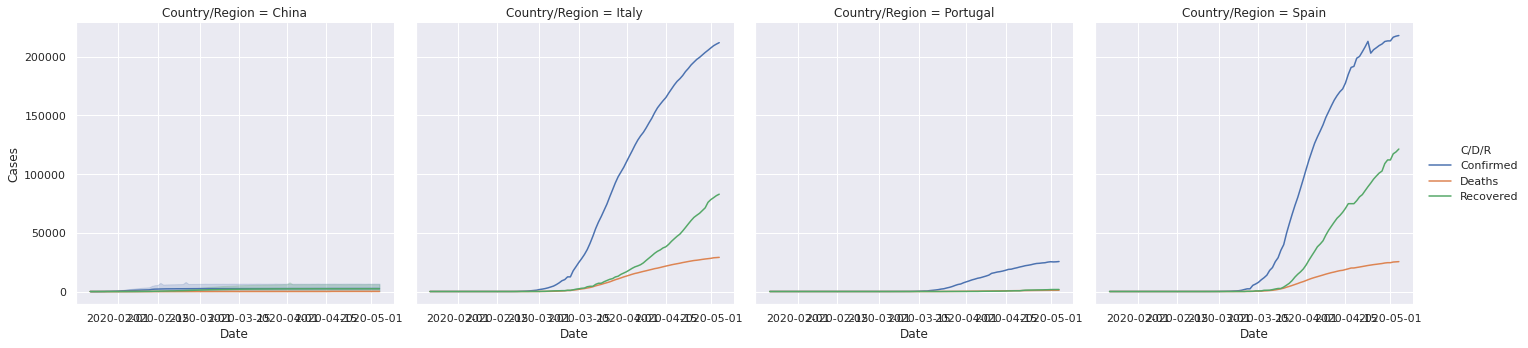

In [72]:

sb.set(style="darkgrid")
portugal_data = covid_data.loc[(covid_data['Country/Region'] == 'Portugal') | (covid_data['Country/Region'] == 'Spain') | (covid_data['Country/Region'] == 'Italy') | (covid_data['Country/Region'] == 'China')  ]
things = ['Confirmed','Deaths','Recovered']
dd = portugal_data.melt(['Date','Country/Region'],var_name='C/D/R', value_name='Cases',
                        value_vars=things)
dd.head()
chart = sb.relplot(x='Date',y='Cases',hue='C/D/R',col='Country/Region',data=dd,kind='line')

axs = chart.axes
#formatting

days = mdates.DayLocator(interval=15)   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%d-%m')


include =['datetime64', 'float', 'int'] 
portugal_data.describe(include = include).transpose()





